<a href="https://colab.research.google.com/github/CAVASOL/aiffel_node/blob/master/dl_project/dl_master_project_cifar10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## DL Master node 10

### 목차

10. 딥러닝 프로젝트

### 10. 딥러닝 프로젝트

**학습 목표**

* Boston Housing 데이터셋을 이용해 주택 가격을 예측하는 딥러닝 모델을 실습합나다.
* Reuters 데이터넷을 이용해 텍스트로 구성된 뉴스 데이터의 주제를 분류하는 딥러닝 모델을 실습합니다.
* CIFAR10 데이터셋을 이용해 여러 객체의 이미지를 분류하는 딥러닝 모델을 실습합니다.

**데이터 로드 및 전처리**

CIFAR10 데이터셋은 32x32 픽셀의 6,000개 컬러 이미지로 이루어져 있습니다. 데이터셋의 각 이미지는 10개의 클래스로 라벨링되어 있습니다.

* CIFAR10 데이터셋을 로드하고, 훈련 데이터셋에서 20%를 검증 데이터셋으로 분리합니다.
* 데이터셋은 keras.datasets에서 불러올 수 있는 CIFAR10 데이터 셋을 활용합니다.
* 데이터셋 분리 작업에서는 sklearn 라이브러리의 train_test_split 함수를 활용합니다.
* 훈련, 검증, 테스트 데이터와 레이블 종류가 몇개인지 출력합니다.

In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras import models, layers
from tensorflow.keras.datasets import cifar10

In [ ]:
# 문제 3-1: cifar10 데이터셋을 로드하고, 훈련 데이터셋에서 20%를 검증 데이터셋으로 분리합니다.

import tensorflow as tf
from sklearn.model_selection import train_test_split

(x_train_full, y_train_full), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

x_train, x_val, y_train, y_val = train_test_split(x_train_full, y_train_full,
                                                  test_size=0.2,
                                                  random_state=42)

# 데이터의 차원 확인
print("전체 학습 데이터: {} 레이블: {}".format(x_train_full.shape, y_train_full.shape))
print("학습 데이터: {} 레이블: {}".format(x_train.shape, y_train.shape))
print("검증 데이터: {} 레이블: {}".format(x_val.shape, y_val.shape))
print("테스트 데이터: {} 레이블: {}".format(x_test.shape, y_test.shape))

전체 학습 데이터: (50000, 32, 32, 3) 레이블: (50000, 1)
학습 데이터: (40000, 32, 32, 3) 레이블: (40000, 1)
검증 데이터: (10000, 32, 32, 3) 레이블: (10000, 1)
테스트 데이터: (10000, 32, 32, 3) 레이블: (10000, 1)


class_name 변수를 만들어 cifar10의 분류에 해당하는 'airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'를 담습니다.

In [ ]:
# cifar10의 분류에 해당하는 'airplane', 'automobile', 'bird', 'cat', 'deer',
# 'dog', 'frog', 'horse', 'ship', 'truck'를 class_name으로 정의합니다.

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

데이터 중 샘플 하나를 시각화해보고, 데이터의 형태를 확인해봅니다.

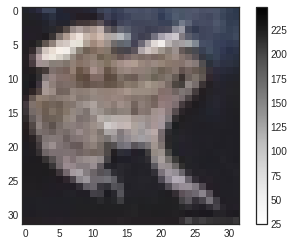

In [ ]:
# 훈련 데이터의 0번째인 x_train[0]를 이미지로 시각화합니다.
import matplotlib.pyplot as plt

plt.style.use('seaborn-white')

plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.show()

In [ ]:
# 훈련, 검증, 테스트 데이터의 형태(shape)을 출력합니다.

print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(40000, 32, 32, 3)
(10000, 32, 32, 3)
(10000, 32, 32, 3)


In [ ]:
# 문제 3-2: 훈련, 검증, 테스트 데이터의 형태(shape)을 32 * 32 * 3 = 3072로 변형합니다.

x_train = x_train.reshape(x_train.shape[0], 3072)
x_val = x_val.reshape(x_val.shape[0], 3072)
x_test = x_test.reshape(x_test.shape[0], 3072)

print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(40000, 3072)
(10000, 3072)
(10000, 3072)


In [ ]:
# 훈련, 검증, 테스트 데이터를 255로 나누어 0~1 사이의 값으로 변환합니다.

x_train = x_train / 255.
x_val = x_val / 255.
x_test = x_test / 255.

**모델 구성 및 컴파일**

BatchNormalization과 Dropout을 적용하여 빠르게 학습하면서 과대적합을 방지하고, 10개의 이미지를 분류하는 딥러닝 모델을 구성합니다.

In [ ]:
# 문제 3-3: BatchNormalization과 Dropout을 적용하여 빠른 학습과 과대적합을 방지하고, 10개의 이미지를 분류하는 딥러닝 모델을 구성합니다.

import tensorflow as tf
from tensorflow.keras import layers, models

model = models.Sequential()
model.add(layers.Dense(2048, input_shape =(32 * 32 * 3, )))
model.add(layers.BatchNormalization())
model.add(layers.Activation("relu"))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1024))
model.add(layers.BatchNormalization())
model.add(layers.Activation("relu"))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512))
model.add(layers.BatchNormalization())
model.add(layers.Activation("relu"))
model.add(layers.Dense(10, activation = "softmax"))

model.compile(optimizer = 'Adam',
              loss = "sparse_categorical_crossentropy",
              metrics = "accuracy")

model.save('cifar10_model_init')
model.summary()

INFO:tensorflow:Assets written to: cifar10_model_init/assets
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 2048)              6293504   
_________________________________________________________________
batch_normalization (BatchNo (None, 2048)              8192      
_________________________________________________________________
activation (Activation)      (None, 2048)              0         
_________________________________________________________________
dropout (Dropout)            (None, 2048)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              2098176   
_________________________________________________________________
batch_normalization_1 (Batch (None, 1024)              4096      
_____________________________________________________________

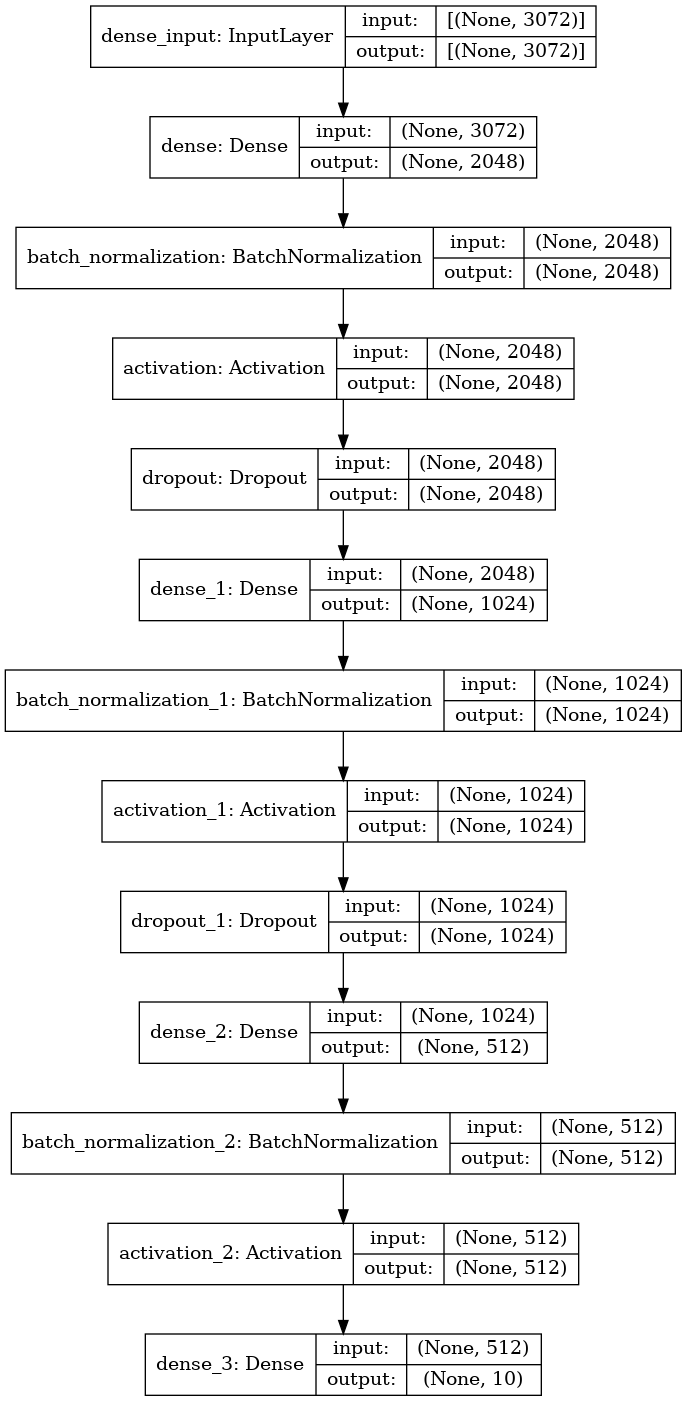

In [ ]:
from tensorflow.keras import utils

utils.plot_model(model, show_shapes=True)

**모델 학습**

ModelCheckpoint와 EarlyStopping 콜백 함수를 적용하여 모델 학습을 진행합니다.

In [ ]:
# 문제 3-4: ModelCheckpoint와 EarlyStopping 콜백 함수를 적용하여 모델 학습을 진행합니다.

from tensorflow.keras import callbacks

check_point_cb = callbacks.ModelCheckpoint('cifar10_model_init',
                                           monitor="val_loss",
                                           save_best_only=True,
                                           mode='min',
                                           verbose=1)

early_stopping_cb = callbacks.EarlyStopping(patience=5,
                                            monitor="val_loss",
                                            restore_best_weights=True,
                                            mode='min',
                                            verbose=1)

history = model.fit(x_train, y_train,
                    epochs=50,
                    validation_data=(x_val, y_val),
                    callbacks=[check_point_cb, early_stopping_cb])

Epoch 1/50
1250/1250 [==============================] - 7s 5ms/step - loss: 1.8430 - accuracy: 0.0953 - val_loss: 1.9799 - val_accuracy: 0.0451

Epoch 00001: val_loss improved from inf to 1.97987, saving model to cifar10_model_init
INFO:tensorflow:Assets written to: cifar10_model_init/assets
Epoch 2/50
1250/1250 [==============================] - 5s 4ms/step - loss: 1.6267 - accuracy: 0.0975 - val_loss: 1.7818 - val_accuracy: 0.0820

Epoch 00002: val_loss improved from 1.97987 to 1.78179, saving model to cifar10_model_init
INFO:tensorflow:Assets written to: cifar10_model_init/assets
Epoch 3/50
1250/1250 [==============================] - 5s 4ms/step - loss: 1.5430 - accuracy: 0.0983 - val_loss: 1.6479 - val_accuracy: 0.0499

Epoch 00003: val_loss improved from 1.78179 to 1.64794, saving model to cifar10_model_init
INFO:tensorflow:Assets written to: cifar10_model_init/assets
Epoch 4/50
1250/1250 [==============================] - 5s 4ms/step - loss: 1.4859 - accuracy: 0.1013 - val_loss:

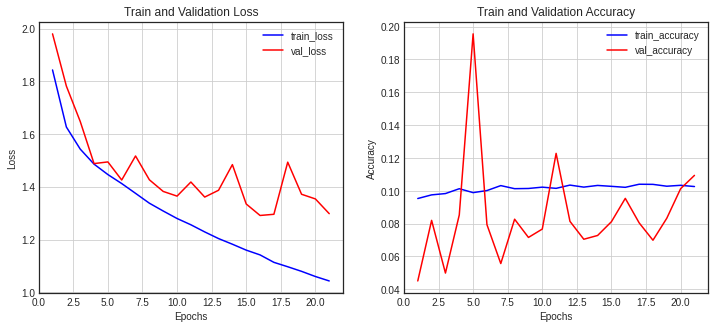

In [ ]:
# 학습 히스토리의 `loss`, `val_loss`, `accuracy`, `val_accuracy`를 차트로 시각화합니다.

plt.style.use('seaborn-white')

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, accuracy, 'b-', label='train_accuracy')
ax2.plot(epochs, val_accuracy, 'r-', label='val_accuracy')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

**모델 평가 및 예측**

In [ ]:
# 문제 2-5: 테스트 데이터셋을 이용해 모델을 평가합니다.

model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 1.2950 - accuracy: 0.0942


[1.2950202226638794, 0.094200000166893]